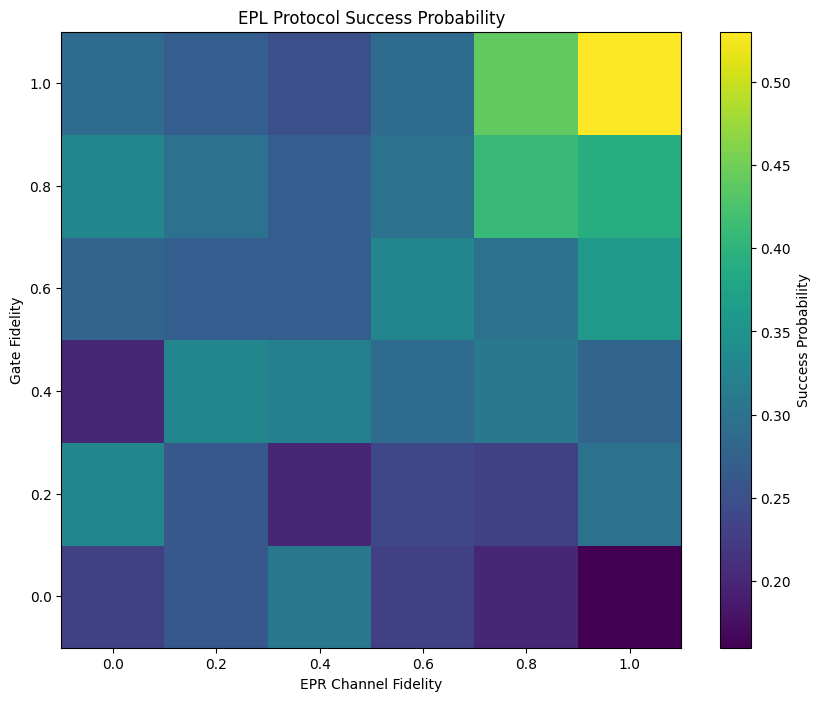

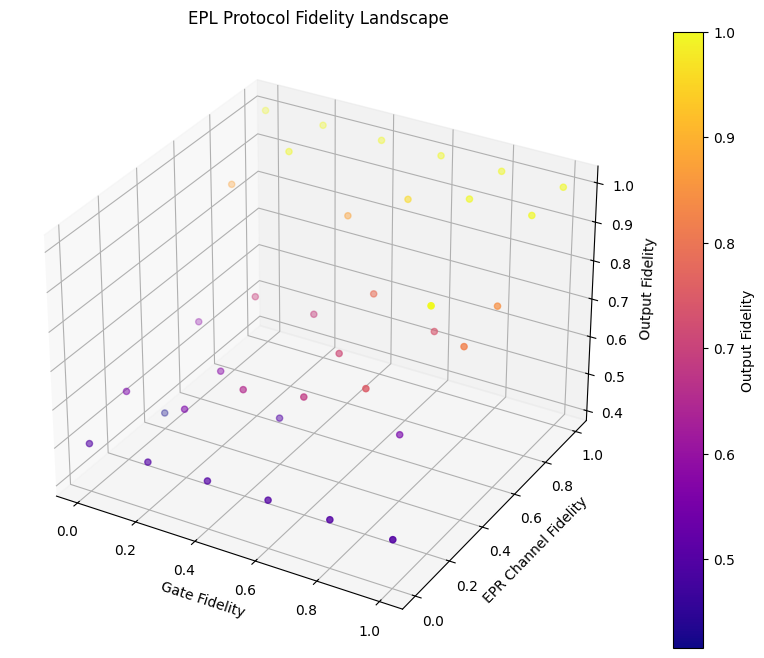

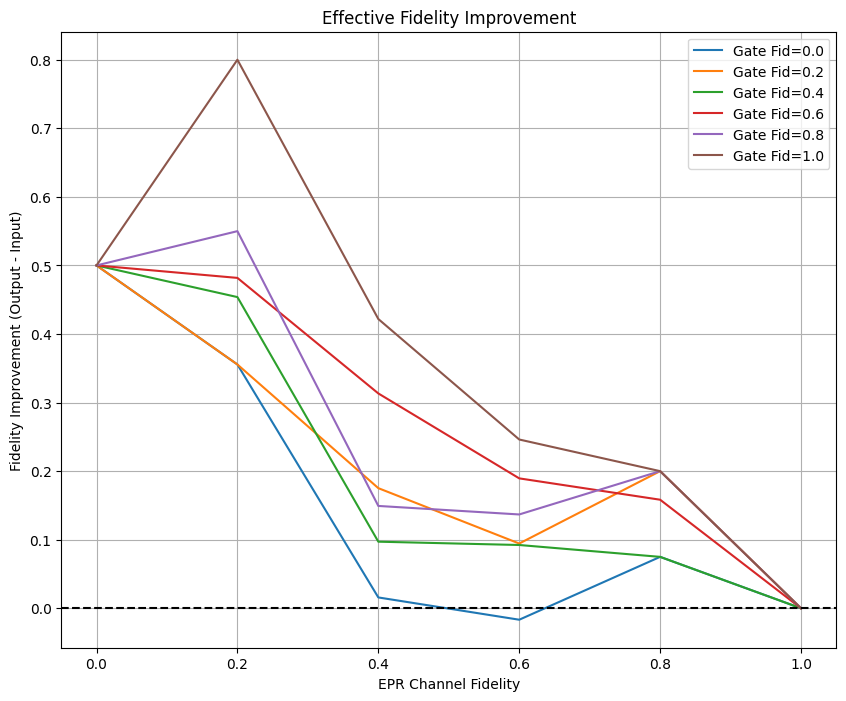

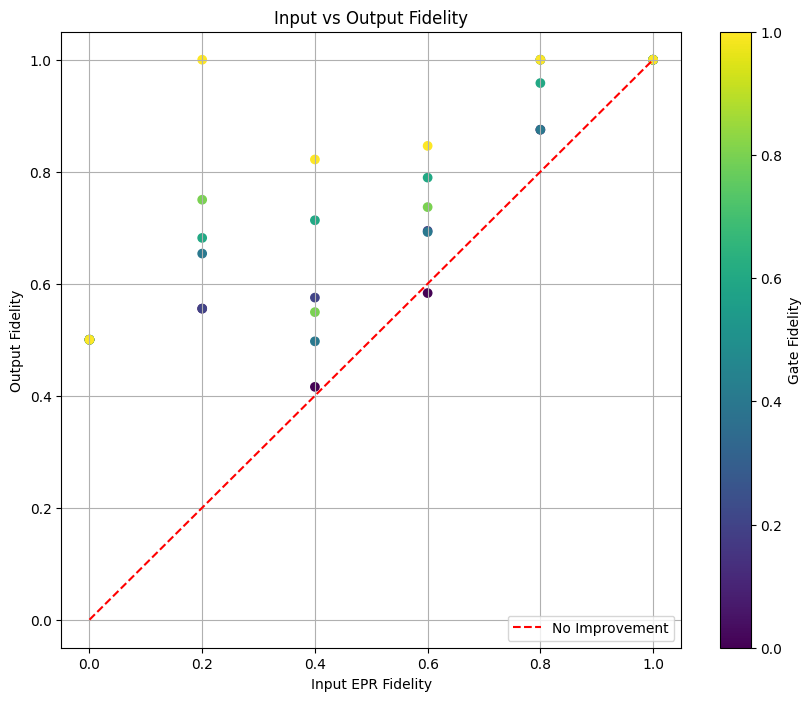

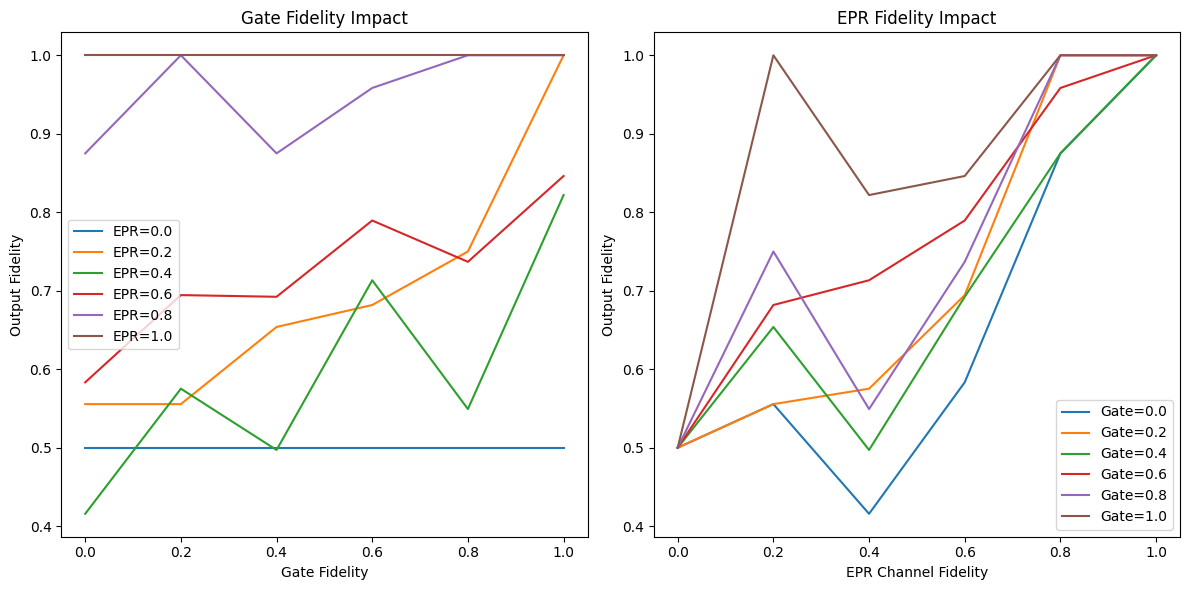


Key Statistics:
Maximum success probability: 0.53
Maximum output fidelity: 1.00


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def load_and_preprocess(filepath='./out_epl.csv'):
    df = pd.read_csv(filepath)

    # Calculate success flag
    df['Success'] = (df['M_Alice'] == 1) & (df['M_Bob'] == 1)  # For EPL

    # Calculate success probability and success-conditioned fidelity
    grouped = df.groupby(['Gate fidelity', 'EPR channel fidelity']).agg({
        'Success': 'mean',
        'Fidelity': lambda x: x[x > 0].mean() if any(x > 0) else 0
    }).reset_index()

    grouped.rename(columns={
        'Success': 'Success Probability',
        'Fidelity': 'Avg Success Fidelity'
    }, inplace=True)

    return df, grouped

def plot_success_heatmap(grouped):
    """Heatmap of success probability vs input parameters."""
    pivoted = grouped.pivot(index='Gate fidelity',
                          columns='EPR channel fidelity',
                          values='Success Probability')

    plt.figure(figsize=(10, 8))
    plt.imshow(pivoted, origin='lower', cmap='viridis', aspect='auto')
    plt.colorbar(label='Success Probability')
    plt.xticks(np.arange(len(pivoted.columns)), pivoted.columns.values.round(2))
    plt.yticks(np.arange(len(pivoted.index)), pivoted.index.values.round(2))
    plt.xlabel('EPR Channel Fidelity')
    plt.ylabel('Gate Fidelity')
    plt.title('EPL Protocol Success Probability')
    plt.show()

def plot_fidelity_improvement(grouped):
    """3D plot of fidelity improvements"""
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    x = grouped['Gate fidelity']
    y = grouped['EPR channel fidelity']
    z = grouped['Avg Success Fidelity']

    sc = ax.scatter(x, y, z, c=z, cmap='plasma')
    ax.set_xlabel('Gate Fidelity')
    ax.set_ylabel('EPR Channel Fidelity')
    ax.set_zlabel('Output Fidelity')
    fig.colorbar(sc, label='Output Fidelity')
    plt.title('EPL Protocol Fidelity Landscape')
    plt.show()

def plot_effective_improvement(grouped):
    """Plot regions where fidelity improves beyond input"""
    plt.figure(figsize=(10, 8))

    for gate_fid in np.unique(grouped['Gate fidelity']):
        subset = grouped[grouped['Gate fidelity'] == gate_fid]
        plt.plot(subset['EPR channel fidelity'],
                 subset['Avg Success Fidelity'] - subset['EPR channel fidelity'],
                 label=f'Gate Fid={gate_fid:.1f}')

    plt.axhline(0, color='black', linestyle='--')
    plt.xlabel('EPR Channel Fidelity')
    plt.ylabel('Fidelity Improvement (Output - Input)')
    plt.title('Effective Fidelity Improvement')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_fidelity_comparison(grouped_df):
    plt.figure(figsize=(10, 8))
    plt.scatter(grouped_df['EPR channel fidelity'],
                grouped_df['Avg Success Fidelity'],
                c=grouped_df['Gate fidelity'],
                cmap='viridis')
    plt.colorbar(label='Gate Fidelity')
    plt.plot([0,1], [0,1], 'r--', label='No Improvement')
    plt.xlabel('Input EPR Fidelity')
    plt.ylabel('Output Fidelity')
    plt.title('Input vs Output Fidelity')
    plt.legend()
    plt.grid(True)
    plt.show()

def parameter_sensitivity(grouped_df):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    for epr_fid in np.unique(grouped_df['EPR channel fidelity']):
        subset = grouped_df[grouped_df['EPR channel fidelity'] == epr_fid]
        plt.plot(subset['Gate fidelity'], subset['Avg Success Fidelity'],
                 label=f'EPR={epr_fid:.1f}')
    plt.xlabel('Gate Fidelity')
    plt.ylabel('Output Fidelity')
    plt.title('Gate Fidelity Impact')
    plt.legend()

    plt.subplot(1, 2, 2)
    for gate_fid in np.unique(grouped_df['Gate fidelity']):
        subset = grouped_df[grouped_df['Gate fidelity'] == gate_fid]
        plt.plot(subset['EPR channel fidelity'], subset['Avg Success Fidelity'],
                 label=f'Gate={gate_fid:.1f}')
    plt.xlabel('EPR Channel Fidelity')
    plt.ylabel('Output Fidelity')
    plt.title('EPR Fidelity Impact')
    plt.legend()

    plt.tight_layout()
    plt.show()

def analyze_protocol_performance():
    # Load and preprocess data
    raw_df, grouped_df = load_and_preprocess()

    # Generate plots
    plot_success_heatmap(grouped_df)
    plot_fidelity_improvement(grouped_df)
    plot_effective_improvement(grouped_df)

    # New analyses
    plot_fidelity_comparison(grouped_df)
    parameter_sensitivity(grouped_df)

    # Print key statistics
    print("\nKey Statistics:")
    print(f"Maximum success probability: {grouped_df['Success Probability'].max():.2f}")
    print(f"Maximum output fidelity: {grouped_df['Avg Success Fidelity'].max():.2f}")


# Run the analysis
analyze_protocol_performance()